In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#Data read
data = pd.read_csv('articulos_ml.csv')
data.shape

(161, 8)

In [8]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [10]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


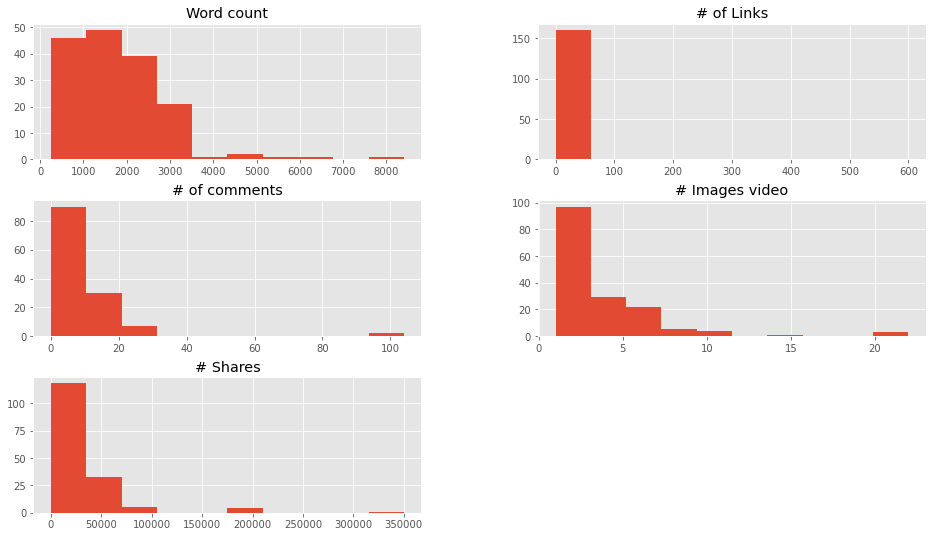

In [13]:
data.drop(['Title','url', 'Elapsed days'],1).hist()
plt.show()

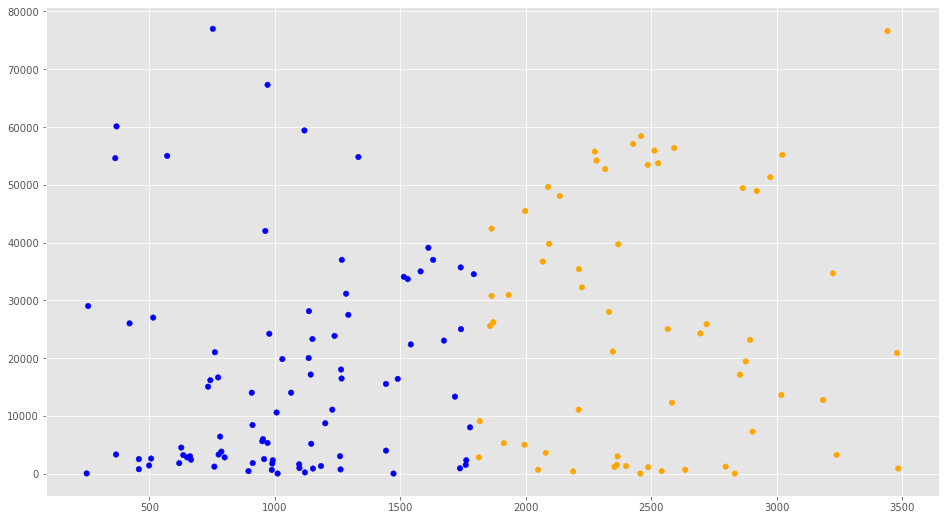

In [18]:
#Filter data
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

colors = ['orange' , 'blue']
size = [30,60]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

assign = []
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        assign.append(colors[0])
    else:
        assign.append(colors[1])

plt.scatter(f1, f2, c=assign, s=size[0])
plt.show()

In [22]:
#labes x,y 
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

#Build object of linear regression
regr = linear_model.LinearRegression()

#Train model
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)

print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print('Variance score: %.2f' % r2_score(y_train, y_pred))


Coefficients: 
 [5.69765366]
Independent term: 
 11200.30322307416
Mean squared error: 372888728.34
Variance score: 0.06


In [23]:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595


In [27]:
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])
 
dataX2 =  pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values



In [29]:
#Regression with Multiple Variables
regr2 = linear_model.LinearRegression()


regr2.fit(XY_train, z_train)
z_pred = regr2.predict(XY_train)

print('Coefficients: \n', regr2.coef_)
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
print('Variance score: %.2f' % r2_score(z_train, z_pred))


Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


Text(0.5, 0.92, 'Linear Regression with Multiple Variables')

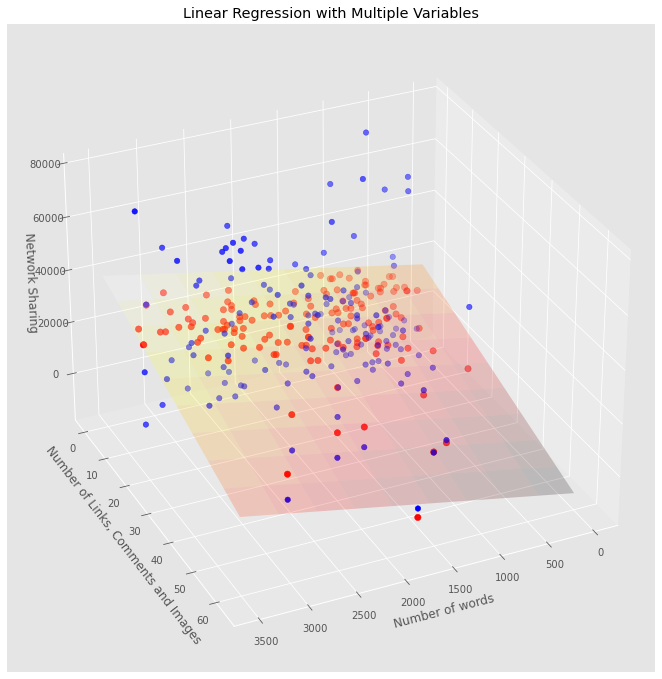

In [31]:
#3D visualization
fig = plt.figure()
ax = Axes3D(fig)

xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

newX = (regr2.coef_[0] * xx)
newY = (regr2.coef_[1] * yy) 

z = (newX + newY+ regr2.intercept_)
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Number of words')
ax.set_ylabel('Number of Links, Comments and Images')
ax.set_zlabel('Network Sharing')
ax.set_title('Linear Regression with Multiple Variables')

In [32]:
#If I want to predict how many "Shares" I will get for an item with:
#2000 words and with links: 10, comments: 4, images: 6
#According to our model, we do:

z_twoThou = regr2.predict([[2000, 10+4+6]])
print(int(z_twoThou))

20518
